In [1]:
from quadrotor import Quadrotor
import gpkit
import numpy as np
gpkit.settings["latex_modelname"] = False
q = Quadrotor()
q.substitutions.update({"W": ("sweep", np.linspace(1, 8, 40)),
                        "d_{prop}": ("sweep", np.linspace(.25,3,10))})
sol = q.solve(skipsweepfailures=True)

Solving over 400 passes.
Sweeping took 11.2 seconds.

Cost
----
 [ 54.9      24.7      15.9      11.8     ... ] [1/hr] 

Sweep Variables
---------------
       W : [ 1.36      1.36      1.36      1.36     ... ]  [lbf] takoff weight     
d_{prop} : [ 0.25      0.556     0.861     1.17     ... ]  [ft]  propeller diameter

Free Variables
--------------
 A_{prop} : [ 0.00456   0.0225    0.0541    0.0993   ... ]  [m**2]    Area of disc formed by 1 prop
        P : [ 73.8      33.2      21.4      15.8     ... ]  [W]       power                        
        T : [ 282       282       282       282      ... ]  [K]       Temperature                  
 W_{batt} : [ 0.0192    0.0192    0.0192    0.0192   ... ]  [lbf]     battery weight               
W_{struc} : [ 0.34      0.34      0.34      0.34     ... ]  [lbf]     Weight of vehicle structure  
     \rho : [ 1.11      1.11      1.11      1.11     ... ]  [kg/m**3] Density                      
        t : [ 0.0182    0.0405    0.0627    0.08

In [ ]:
import matplotlib.pyplot as plt
%pylab inline
plt.plot(sol("W"), sol("t"))
plt.xlabel("max takeoff weight")
plt.ylabel("endurance")
plt.figure()
plt.plot(sol("W"), sol("W_{batt}"))
plt.plot(sol("W"), sol("W_{struc}"))
plt.plot(sol("W"), sol("W_{payload}"))

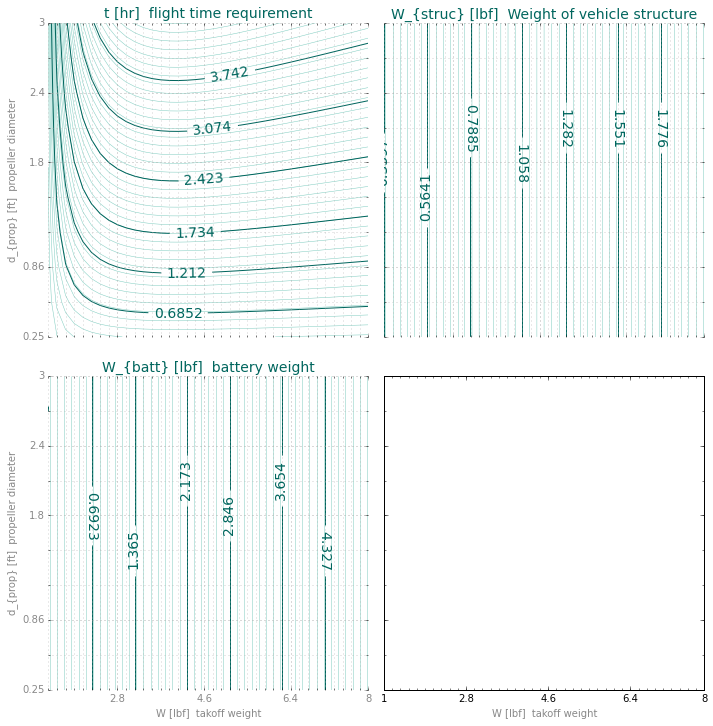

In [5]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
_ = contour_array(q, "W", "d_{prop}", ["t", "W_{struc}", "W_{batt}"])